In [10]:
# Mount drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')

# Change matlibplot default text color
PLOT_TEXT_COLOR = 'white'
plt.rcParams['text.color'] = PLOT_TEXT_COLOR
plt.rcParams['axes.labelcolor'] = PLOT_TEXT_COLOR
plt.rcParams['xtick.color'] = PLOT_TEXT_COLOR
plt.rcParams['ytick.color'] = PLOT_TEXT_COLOR

In [12]:
# Excluded columns for multiple scenarios
# Count only:
df_count_only_excluded_cols = [ 
    'tackles_r_mean', 'tackles_r_skew', 'tackles_r_kurtosis', 'tackles_r_var', 'tackles_r_median',
    'offsides_r_mean', 'offsides_r_skew', 'offsides_r_kurtosis', 'offsides_r_var', 'offsides_r_median',
    'yellow_cards_r_mean', 'yellow_cards_r_skew', 'yellow_cards_r_kurtosis', 'yellow_cards_r_var', 'yellow_cards_r_median',
    'fouls_l_mean', 'fouls_l_skew', 'fouls_l_kurtosis', 'fouls_l_var', 'fouls_l_median',
    'corners_l_mean', 'corners_l_skew', 'corners_l_kurtosis', 'corners_l_var', 'corners_l_median',
    'goals_r_mean', 'goals_r_skew', 'goals_r_kurtosis', 'goals_r_var', 'goals_r_median',
    'tackles_l_mean', 'tackles_l_skew', 'tackles_l_kurtosis', 'tackles_l_var', 'tackles_l_median',
    'goals_l_mean', 'goals_l_skew', 'goals_l_kurtosis', 'goals_l_var', 'goals_l_median',
    'corners_r_mean', 'corners_r_skew', 'corners_r_kurtosis', 'corners_r_var', 'corners_r_median',
    'red_cards_r_mean', 'red_cards_r_skew', 'red_cards_r_kurtosis', 'red_cards_r_var', 'red_cards_r_median',
    'red_cards_l_mean', 'red_cards_l_skew', 'red_cards_l_kurtosis', 'red_cards_l_var', 'red_cards_l_median',
    'yellow_cards_l_mean', 'yellow_cards_l_skew', 'yellow_cards_l_kurtosis', 'yellow_cards_l_var', 'yellow_cards_l_median',
    'free_kicks_r_mean', 'free_kicks_r_skew', 'free_kicks_r_kurtosis', 'free_kicks_r_var','free_kicks_r_median', 'free_kicks_r_median',
    'free_kicks_l_mean', 'free_kicks_l_skew', 'free_kicks_l_kurtosis', 'free_kicks_l_var','free_kicks_l_median', 'free_kicks_l_median',
    'fouls_r_mean', 'fouls_r_skew', 'fouls_r_kurtosis', 'fouls_r_var', 'fouls_r_median',
    'offsides_l_mean', 'offsides_l_skew', 'offsides_l_kurtosis', 'offsides_l_var', 'offsides_l_median',
]

df_empty_features_excluded = []

try:
    df = pd.read_csv("/content/drive/My Drive/Studium/Master Thesis/Data/dataset.csv")
except FileNotFoundError:
    df = pd.read_csv("data/dataset.csv")

df = df.drop(columns=['id'])
df = df.drop(columns=df_count_only_excluded_cols)


df.head(4)

,tackles_r_count,offsides_r_count,total_shots_l,yellow_cards_r_count,fouls_l_count,shots_on_target_l,corners_l_count,total_shots_r,goals_r_count,shots_on_target_r,...,red_cards_r_count,red_cards_l_count,passes_l,yellow_cards_l_count,free_kicks_r_count,free_kicks_l_count,fouls_r_count,offsides_l_count,ball_on_side_l,pass_chains_l_count
0,41,0,13,0,8,22,2,0,0,0,...,0,0,779,1,9,4,2,0,46,0
1,28,0,6,0,8,6,3,0,0,1,...,0,0,696,2,9,2,2,1,62,0
2,22,0,18,0,6,63,0,0,1,0,...,0,0,833,0,6,2,2,0,48,0
3,33,0,5,0,3,42,1,0,1,1,...,0,0,830,0,4,2,1,0,57,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   tackles_r_count       9996 non-null   int64
 1   offsides_r_count      9996 non-null   int64
 2   total_shots_l         9996 non-null   int64
 3   yellow_cards_r_count  9996 non-null   int64
 4   fouls_l_count         9996 non-null   int64
 5   shots_on_target_l     9996 non-null   int64
 6   corners_l_count       9996 non-null   int64
 7   total_shots_r         9996 non-null   int64
 8   goals_r_count         9996 non-null   int64
 9   shots_on_target_r     9996 non-null   int64
 10  passes_r              9996 non-null   int64
 11  possession_r          9996 non-null   int64
 12  pass_chains_r_count   9996 non-null   int64
 13  tackles_l_count       9996 non-null   int64
 14  possession_l          9996 non-null   int64
 15  goals_l_count         9996 non-null   int64
 16  corner

In [14]:
df.nunique()

tackles_r_count          49
offsides_r_count          4
total_shots_l            76
yellow_cards_r_count      3
fouls_l_count            20
shots_on_target_l       104
corners_l_count           9
total_shots_r             1
goals_r_count             6
shots_on_target_r        33
passes_r                336
possession_r             49
pass_chains_r_count       1
tackles_l_count          45
possession_l             49
goals_l_count            10
corners_r_count           5
ball_on_side_r           62
red_cards_r_count         1
red_cards_l_count         1
passes_l                599
yellow_cards_l_count      6
free_kicks_r_count       23
free_kicks_l_count       12
fouls_r_count            10
offsides_l_count          6
ball_on_side_l           62
pass_chains_l_count       1
dtype: int64

In [15]:
variances = df.var()
zero_var_cols = variances[variances == 0].index
df = df.drop(columns=zero_var_cols)

tackles_r_count            41.472378
offsides_r_count            0.116517
total_shots_l             138.688604
yellow_cards_r_count        0.051831
fouls_l_count               7.853104
shots_on_target_l         269.840746
corners_l_count             1.525673
total_shots_r               0.000000
goals_r_count               0.786121
shots_on_target_r          20.894117
passes_r                 2969.181595
possession_r               43.590656
pass_chains_r_count         0.000000
tackles_l_count            33.148983
possession_l               43.590656
goals_l_count               1.337363
corners_r_count             0.233071
ball_on_side_r             78.248461
red_cards_r_count           0.000000
red_cards_l_count           0.000000
passes_l                10848.156830
yellow_cards_l_count        0.451814
free_kicks_r_count          8.496761
free_kicks_l_count          2.721174
fouls_r_count               2.275831
offsides_l_count            0.343571
ball_on_side_l             78.248461
p

<AxesSubplot:>

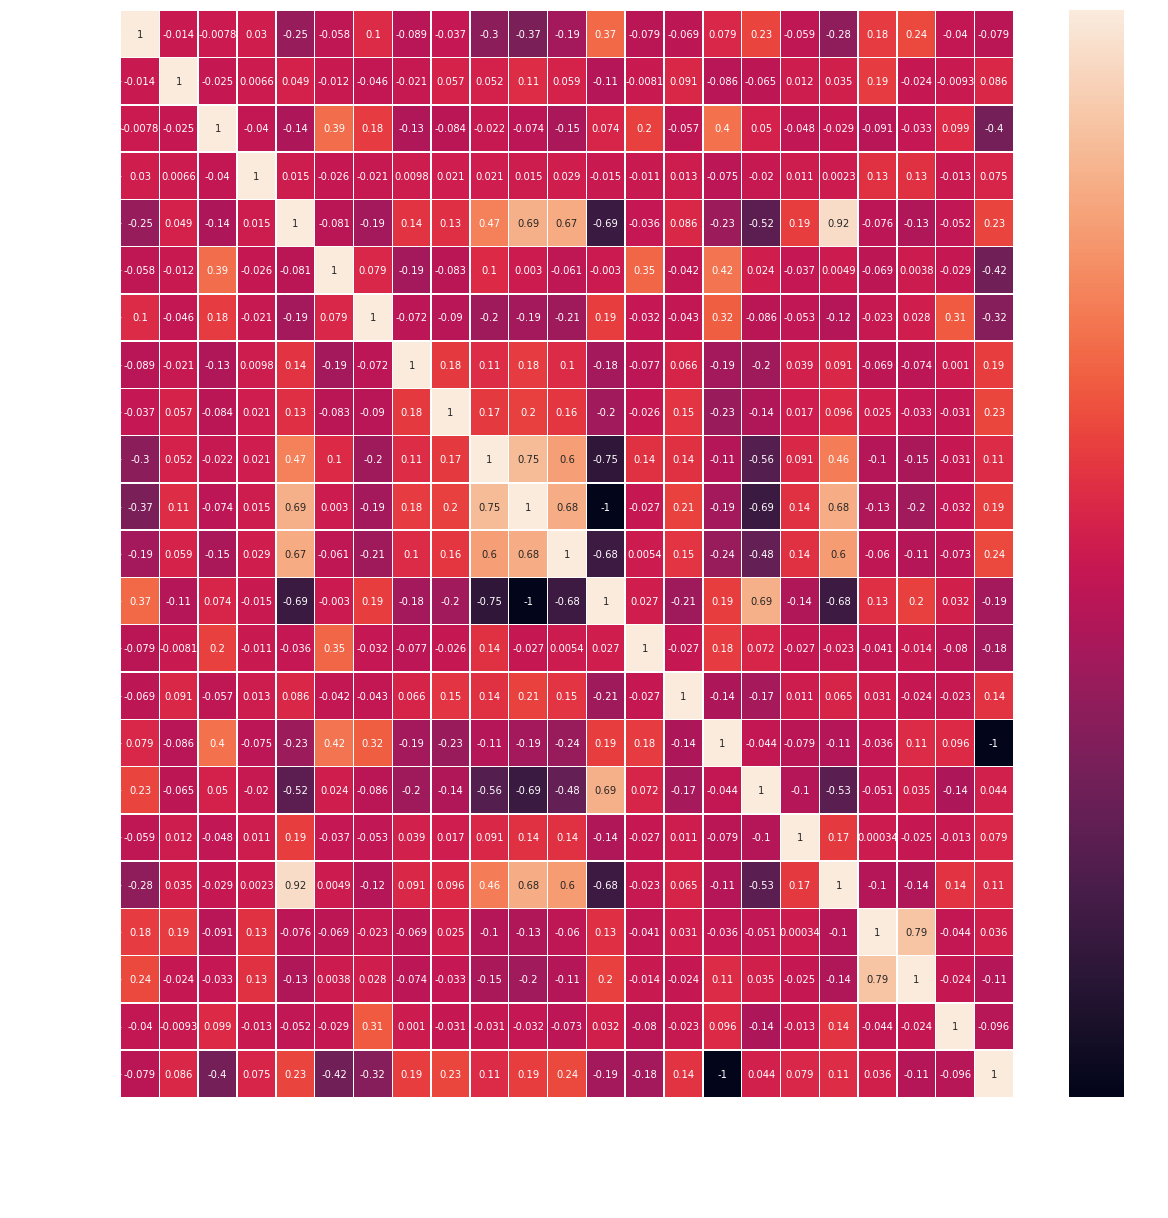

In [18]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat, linewidths=.5, annot=True, ax=ax)

In [22]:
corr_threshold = 0.75
unsigned_corr_mat = corr_mat.abs()
mat_upper_triangle = (unsigned_corr_mat.where(np.triu(np.ones(unsigned_corr_mat.shape), k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
highly_correlated_pairs = mat_upper_triangle[mat_upper_triangle >= corr_threshold]

highly_correlated_cols = []
for col_pair in highly_correlated_pairs.index:
    highly_correlated_cols.append(col_pair[0])

df = df.drop(columns=highly_correlated_cols)

(6,)
(28,)
(219,)


In [ ]:
df_ids = df["id"]
df = df.drop(columns=["id"])

model = IsolationForest(contamination="auto")

df_norm = (df - df.mean()) / df.std() # normalizing the data

model.fit(df_norm)

df_pred = df.copy()
df_pred['score'] = model.decision_function(df_norm)
df_pred['outlier'] = model.predict(df_norm)

#### Result Plots

In [ ]:
sns.pairplot(df_pred, size=4, kind='scatter', diag_kind='hist', hue="outlier")

In [ ]:
cpal7 = sns.color_palette("coolwarm", n_colors=6, desat=0.2)
cpal2 = sns.color_palette("coolwarm", n_colors=2, desat=0.2)

# Dividing the score in bins: makes the plot faster
bins = [-0.20, -0.15, -0.10, -0.05, 0, 0.05, 0.1]
df_pred['binned_score'] = pd.cut(df_pred['score'], bins)

sns.displot(df_pred, x="score")
sns.displot(df_pred, x="score", hue="outlier", kind="kde",  cpal=cpal2)
sns.scatterplot(data=df_pred, x="goals_l_count", y="goals_r_count", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="goals_l_count", y="passes_l", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="goals_r_count", y="passes_r", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="goals_r_count", y="passes_l", hue="binned_score", style="outlier",  cpal=cpal7)

sns.scatterplot(data=df_pred, x="possession_l", y="shots_on_target_r", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="possession_l", y="passes_r", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="possession_l", y="shots_on_target_l", hue="binned_score", style="outlier",  cpal=cpal7)
sns.scatterplot(data=df_pred, x="possession_l", y="passes_l", hue="binned_score", style="outlier",  cpal=cpal7)